In [47]:
#Import necessary functions
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium

from datetime import datetime as dt
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

ModuleNotFoundError: No module named 'folium'

In [2]:
df = pd.read_csv('data/Final_Motor_Vehicle_Collisions_QuBr_2018-2023_Class.csv')
df.head()

,CRASH DATE TIME,COLLISION_ID,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,CONTRIBUTING CATEGORY V1,CONTRIBUTING CATEGORY V2,SEASON,TIME OF DAY,IS RUSH HOUR
0,2018-01-01 00:00:00,3820945,BROOKLYN,11234,40.628770,-73.91825,1,0,Failure to Yield Right-of-Way,Passing or Lane Usage Improper,Sedan,Bike,Moving Violation,Moving Violation,Winter,Late Night,False
1,2018-01-01 00:48:00,3821048,BROOKLYN,11203,40.639260,-73.93777,0,0,Traffic Control Device Improper/Non-Working,Traffic Control Device Improper/Non-Working,Station Wagon/Sport Utility Vehicle,Sedan,Road Conditions,Road Conditions,Winter,Late Night,False
2,2018-01-01 01:30:00,3819375,QUEENS,11101,40.740913,-73.95226,0,0,Following Too Closely,Following Too Closely,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Moving Violation,Moving Violation,Winter,Late Night,False
3,2018-01-01 01:55:00,3821031,BROOKLYN,11226,40.652412,-73.95396,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,Sedan,Sedan,Driver Error,Driver Error,Winter,Late Night,False
4,2018-01-01 02:29:00,3820976,QUEENS,11418,40.694690,-73.83505,2,0,Other Vehicular,Following Too Closely,Station Wagon/Sport Utility Vehicle,Sedan,Third-Party (Vehicular),Moving Violation,Winter,Early Morning,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30862 entries, 0 to 30861
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE TIME                30862 non-null  object 
 1   COLLISION_ID                   30862 non-null  int64  
 2   BOROUGH                        30862 non-null  object 
 3   ZIP CODE                       30862 non-null  int64  
 4   LATITUDE                       30862 non-null  float64
 5   LONGITUDE                      30862 non-null  float64
 6   NUMBER OF PERSONS INJURED      30862 non-null  int64  
 7   NUMBER OF PERSONS KILLED       30862 non-null  int64  
 8   CONTRIBUTING FACTOR VEHICLE 1  30862 non-null  object 
 9   CONTRIBUTING FACTOR VEHICLE 2  30862 non-null  object 
 10  VEHICLE TYPE CODE 1            30862 non-null  object 
 11  VEHICLE TYPE CODE 2            30862 non-null  object 
 12  CONTRIBUTING CATEGORY V1       30862 non-null 

In [4]:
#Change column to datetime datatype
df['CRASH DATE TIME'] = pd.to_datetime(df['CRASH DATE TIME'])

#### Changing DateTime Index

In [5]:
#Set to datetime index
#df.set_index('CRASH DATE TIME', inplace=True)

In [6]:
#Review the contributing factors
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts(sort=True).head()

Driver Inattention/Distraction    12610
Other Vehicular                    3059
Failure to Yield Right-of-Way      2612
Passing or Lane Usage Improper     1983
Passing Too Closely                1286
Name: CONTRIBUTING FACTOR VEHICLE 1, dtype: int64

### Season

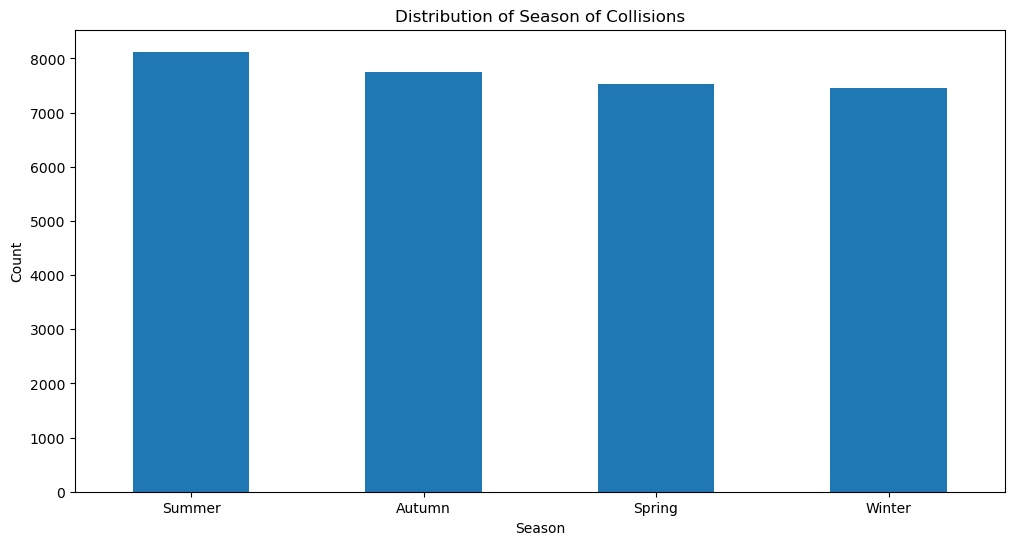

In [7]:
# Set up plots
fig, (ax) = plt.subplots(figsize=(12,6))

df['SEASON'].value_counts().plot(kind='bar')

# Customize appearance
ax.set_xlabel('Season');
ax.set_ylabel('Count')
ax.set_title('Distribution of Season of Collisions')
ax.tick_params(axis='x', labelrotation=0);

### Time of Day

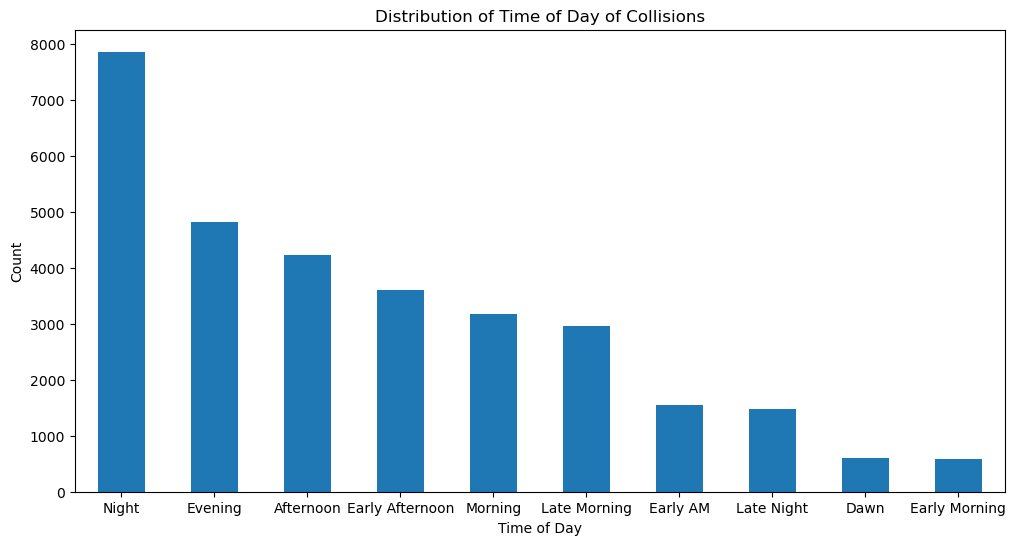

In [8]:
# Set up plots
fig, (ax) = plt.subplots(figsize=(12,6))

df['TIME OF DAY'].value_counts().plot(kind='bar')

# Customize appearance
ax.set_xlabel('Time of Day');
ax.set_ylabel('Count')
ax.set_title('Distribution of Time of Day of Collisions')
ax.tick_params(axis='x', labelrotation=0);

### Rush Hour

In [9]:
df['IS RUSH HOUR'].value_counts()

False    20230
True     10632
Name: IS RUSH HOUR, dtype: int64

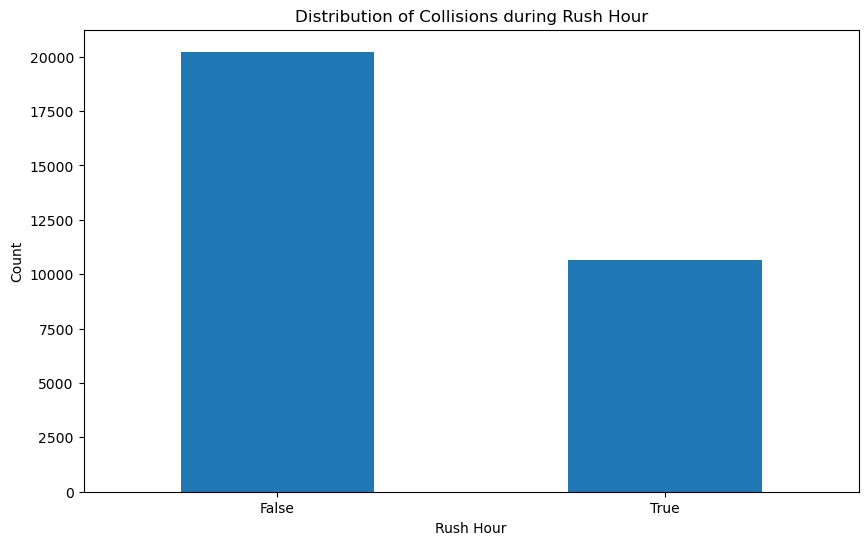

In [10]:
# Set up plots
fig, (ax) = plt.subplots(figsize=(10,6))

df['IS RUSH HOUR'].value_counts().plot(kind='bar')

# Customize appearance
ax.set_xlabel('Rush Hour');
ax.set_ylabel('Count')
ax.set_title('Distribution of Collisions during Rush Hour')
ax.tick_params(axis='x', labelrotation=0);

### Contributing Factor Graphs

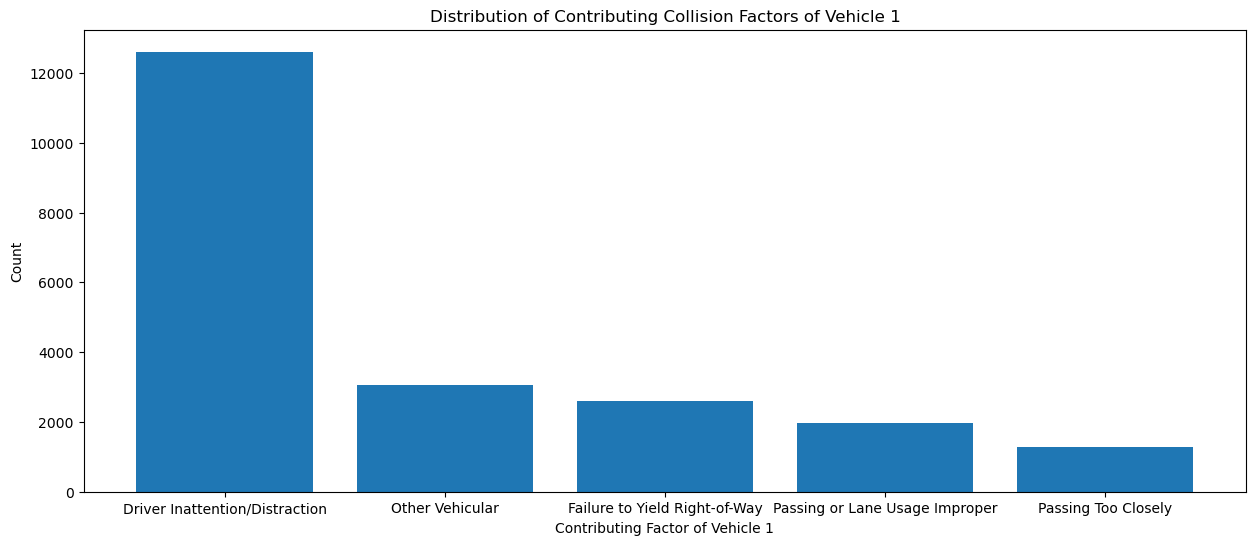

In [11]:
# Set up plots
fig, (ax) = plt.subplots(figsize=(15,6))

# Create variable for easier reuse
causes_counts = df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()[:5]

# Plot bar chart 
ax.bar(causes_counts.index, causes_counts.values)

# Customize appearance
ax.set_xlabel('Contributing Factor of Vehicle 1');
ax.set_ylabel('Count')
ax.set_title('Distribution of Contributing Collision Factors of Vehicle 1');

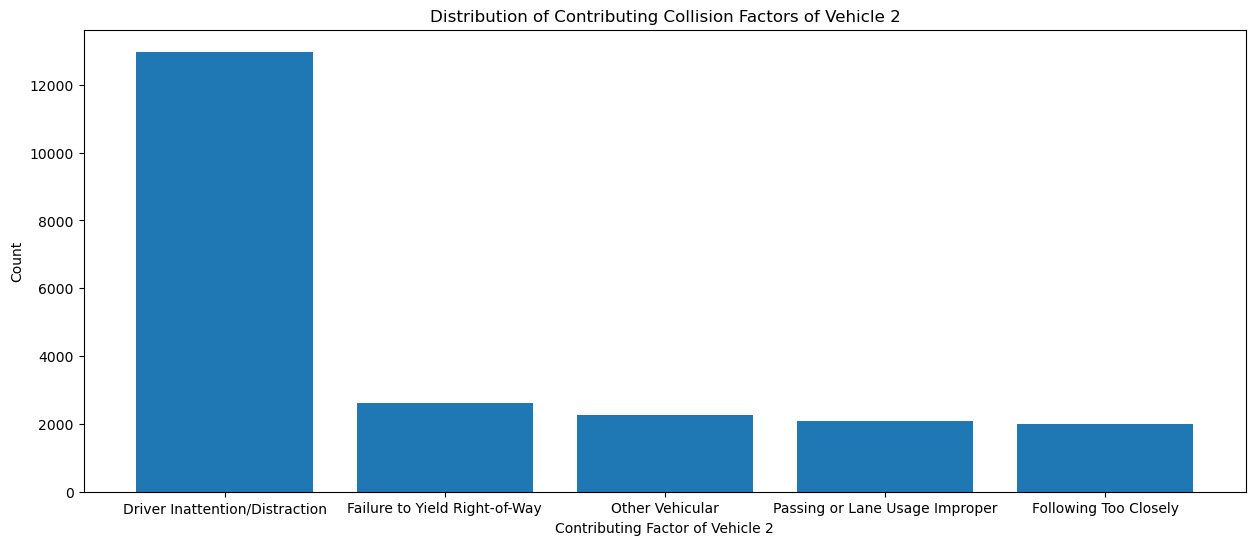

In [12]:
# Set up plots
fig, (ax) = plt.subplots(figsize=(15,6))

# Create variable for easier reuse
causes_counts2 = df['CONTRIBUTING FACTOR VEHICLE 2'].value_counts()[:5]

# Plot bar chart 
ax.bar(causes_counts2.index, causes_counts2.values)

# Customize appearance
ax.set_xlabel('Contributing Factor of Vehicle 2');
ax.set_ylabel('Count')
ax.set_title('Distribution of Contributing Collision Factors of Vehicle 2');

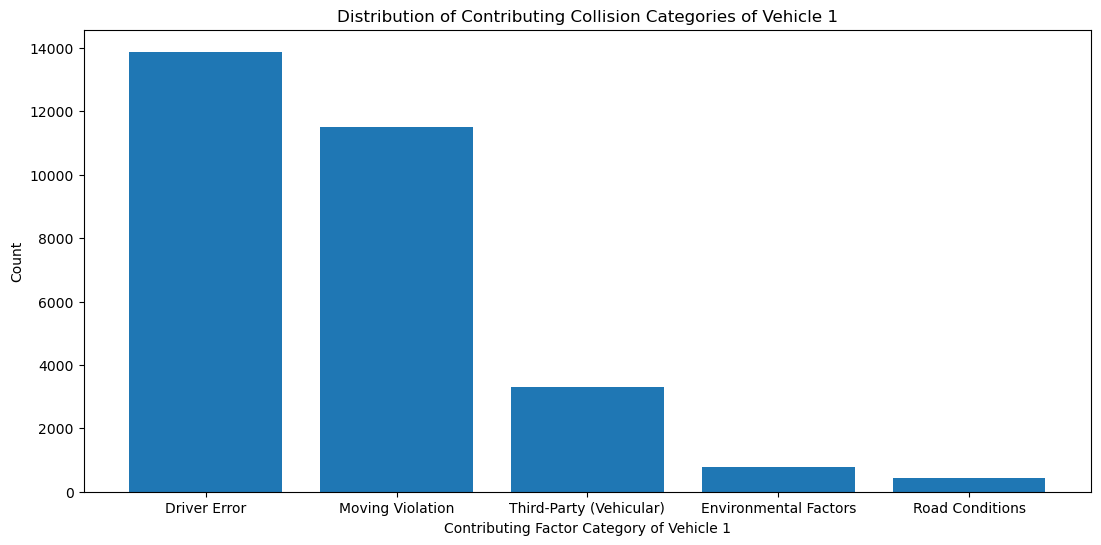

In [13]:
# Set up plots
fig, (ax) = plt.subplots(figsize=(13,6))

# Create variable for easier reuse
category_counts = df['CONTRIBUTING CATEGORY V1'].value_counts()[:5]

# Plot bar chart 
ax.bar(category_counts.index, category_counts.values)

# Customize appearance
ax.set_xlabel('Contributing Factor Category of Vehicle 1');
ax.set_ylabel('Count')
ax.set_title('Distribution of Contributing Collision Categories of Vehicle 1');

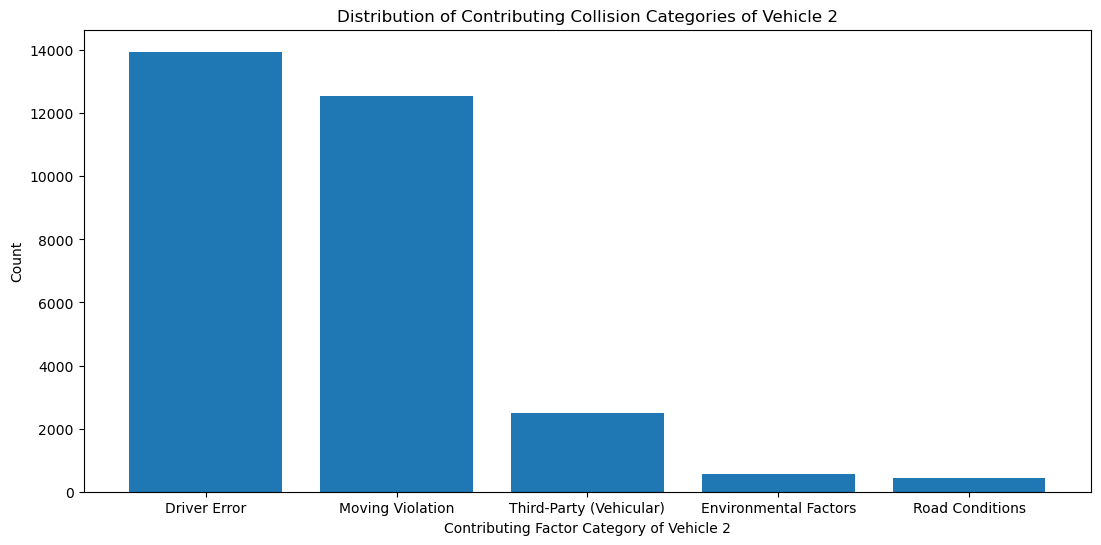

In [14]:
# Set up plots
fig, (ax) = plt.subplots(figsize=(13,6))

# Create variable for easier reuse
category_counts2 = df['CONTRIBUTING CATEGORY V2'].value_counts()[:5]

# Plot bar chart 
ax.bar(category_counts2.index, category_counts2.values)

# Customize appearance
ax.set_xlabel('Contributing Factor Category of Vehicle 2');
ax.set_ylabel('Count')
ax.set_title('Distribution of Contributing Collision Categories of Vehicle 2');

In [15]:
df

,CRASH DATE TIME,COLLISION_ID,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,CONTRIBUTING CATEGORY V1,CONTRIBUTING CATEGORY V2,SEASON,TIME OF DAY,IS RUSH HOUR
0,2018-01-01 00:00:00,3820945,BROOKLYN,11234,40.628770,-73.918250,1,0,Failure to Yield Right-of-Way,Passing or Lane Usage Improper,Sedan,Bike,Moving Violation,Moving Violation,Winter,Late Night,False
1,2018-01-01 00:48:00,3821048,BROOKLYN,11203,40.639260,-73.937770,0,0,Traffic Control Device Improper/Non-Working,Traffic Control Device Improper/Non-Working,Station Wagon/Sport Utility Vehicle,Sedan,Road Conditions,Road Conditions,Winter,Late Night,False
2,2018-01-01 01:30:00,3819375,QUEENS,11101,40.740913,-73.952260,0,0,Following Too Closely,Following Too Closely,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Moving Violation,Moving Violation,Winter,Late Night,False
3,2018-01-01 01:55:00,3821031,BROOKLYN,11226,40.652412,-73.953960,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,Sedan,Sedan,Driver Error,Driver Error,Winter,Late Night,False
4,2018-01-01 02:29:00,3820976,QUEENS,11418,40.694690,-73.835050,2,0,Other Vehicular,Following Too Closely,Station Wagon/Sport Utility Vehicle,Sedan,Third-Party (Vehicular),Moving Violation,Winter,Early Morning,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30857,2023-01-01 10:15:00,4594589,BROOKLYN,11207,40.678160,-73.897484,0,0,Driver Inattention/Distraction,Driver Inexperience,Sedan,Sedan,Driver Error,Driver Error,Winter,Late Morning,False
30858,2023-01-01 14:53:00,4594583,BROOKLYN,11208,40.660797,-73.871830,2,0,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,Station Wagon/Sport Utility Vehicle,Sedan,Moving Violation,Moving Violation,Winter,Afternoon,False
30859,2023-01-01 19:26:00,4594645,QUEENS,11434,40.689915,-73.777900,1,0,Passenger Distraction,Driver Inattention/Distraction,Sedan,Sedan,Other Distractions,Driver Error,Winter,Night,False
30860,2023-01-01 20:45:00,4594571,BROOKLYN,11209,40.622860,-74.025350,5,0,Unsafe Speed,Failure to Yield Right-of-Way,Sedan,Sedan,Moving Violation,Moving Violation,Winter,Night,False


In [16]:
years_status = df['CONTRIBUTING CATEGORY V1']
years_status

0               Moving Violation
1                Road Conditions
2               Moving Violation
3                   Driver Error
4        Third-Party (Vehicular)
                  ...           
30857               Driver Error
30858           Moving Violation
30859         Other Distractions
30860           Moving Violation
30861    Third-Party (Vehicular)
Name: CONTRIBUTING CATEGORY V1, Length: 30862, dtype: object

In [17]:
years_status_dum = pd.get_dummies(years_status, columns=['status_group'])
years_status_dum

,Bodily Impairment,Driver Error,Environmental Factors,Internal Electronics Usage,Moving Violation,Other Distractions,Road Conditions,Third-Party (Non-Vehicular),Third-Party (Vehicular),Vehicle Defects
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
30857,0,1,0,0,0,0,0,0,0,0
30858,0,0,0,0,1,0,0,0,0,0
30859,0,0,0,0,0,1,0,0,0,0
30860,0,0,0,0,1,0,0,0,0,0


In [18]:
df

,CRASH DATE TIME,COLLISION_ID,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,CONTRIBUTING CATEGORY V1,CONTRIBUTING CATEGORY V2,SEASON,TIME OF DAY,IS RUSH HOUR
0,2018-01-01 00:00:00,3820945,BROOKLYN,11234,40.628770,-73.918250,1,0,Failure to Yield Right-of-Way,Passing or Lane Usage Improper,Sedan,Bike,Moving Violation,Moving Violation,Winter,Late Night,False
1,2018-01-01 00:48:00,3821048,BROOKLYN,11203,40.639260,-73.937770,0,0,Traffic Control Device Improper/Non-Working,Traffic Control Device Improper/Non-Working,Station Wagon/Sport Utility Vehicle,Sedan,Road Conditions,Road Conditions,Winter,Late Night,False
2,2018-01-01 01:30:00,3819375,QUEENS,11101,40.740913,-73.952260,0,0,Following Too Closely,Following Too Closely,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Moving Violation,Moving Violation,Winter,Late Night,False
3,2018-01-01 01:55:00,3821031,BROOKLYN,11226,40.652412,-73.953960,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,Sedan,Sedan,Driver Error,Driver Error,Winter,Late Night,False
4,2018-01-01 02:29:00,3820976,QUEENS,11418,40.694690,-73.835050,2,0,Other Vehicular,Following Too Closely,Station Wagon/Sport Utility Vehicle,Sedan,Third-Party (Vehicular),Moving Violation,Winter,Early Morning,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30857,2023-01-01 10:15:00,4594589,BROOKLYN,11207,40.678160,-73.897484,0,0,Driver Inattention/Distraction,Driver Inexperience,Sedan,Sedan,Driver Error,Driver Error,Winter,Late Morning,False
30858,2023-01-01 14:53:00,4594583,BROOKLYN,11208,40.660797,-73.871830,2,0,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,Station Wagon/Sport Utility Vehicle,Sedan,Moving Violation,Moving Violation,Winter,Afternoon,False
30859,2023-01-01 19:26:00,4594645,QUEENS,11434,40.689915,-73.777900,1,0,Passenger Distraction,Driver Inattention/Distraction,Sedan,Sedan,Other Distractions,Driver Error,Winter,Night,False
30860,2023-01-01 20:45:00,4594571,BROOKLYN,11209,40.622860,-74.025350,5,0,Unsafe Speed,Failure to Yield Right-of-Way,Sedan,Sedan,Moving Violation,Moving Violation,Winter,Night,False


In [19]:
#df.rename(columns = {'CRASH DATE TIME':'DATETIME'}, inplace = True)
#df

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30862 entries, 0 to 30861
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CRASH DATE TIME                30862 non-null  datetime64[ns]
 1   COLLISION_ID                   30862 non-null  int64         
 2   BOROUGH                        30862 non-null  object        
 3   ZIP CODE                       30862 non-null  int64         
 4   LATITUDE                       30862 non-null  float64       
 5   LONGITUDE                      30862 non-null  float64       
 6   NUMBER OF PERSONS INJURED      30862 non-null  int64         
 7   NUMBER OF PERSONS KILLED       30862 non-null  int64         
 8   CONTRIBUTING FACTOR VEHICLE 1  30862 non-null  object        
 9   CONTRIBUTING FACTOR VEHICLE 2  30862 non-null  object        
 10  VEHICLE TYPE CODE 1            30862 non-null  object        
 11  VEHICLE TYPE CO

In [21]:
#calculate sum of sales grouped by day
#df.groupby(df.DATETIME.dt.day)['CONTRIBUTING FACTOR VEHICLE 1'].sum()


### Group by

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30862 entries, 0 to 30861
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CRASH DATE TIME                30862 non-null  datetime64[ns]
 1   COLLISION_ID                   30862 non-null  int64         
 2   BOROUGH                        30862 non-null  object        
 3   ZIP CODE                       30862 non-null  int64         
 4   LATITUDE                       30862 non-null  float64       
 5   LONGITUDE                      30862 non-null  float64       
 6   NUMBER OF PERSONS INJURED      30862 non-null  int64         
 7   NUMBER OF PERSONS KILLED       30862 non-null  int64         
 8   CONTRIBUTING FACTOR VEHICLE 1  30862 non-null  object        
 9   CONTRIBUTING FACTOR VEHICLE 2  30862 non-null  object        
 10  VEHICLE TYPE CODE 1            30862 non-null  object        
 11  VEHICLE TYPE CO

In [26]:
#Group the values by day and count the number of instances of each value
v1_cat_count = df.groupby([df['CRASH DATE TIME'].dt.date, 'CONTRIBUTING CATEGORY V1']).size().reset_index(name='count')

#Print the result
print(v1_cat_count)

     CRASH DATE TIME CONTRIBUTING CATEGORY V1  count
0         2018-01-01             Driver Error      9
1         2018-01-01    Environmental Factors      1
2         2018-01-01         Moving Violation      8
3         2018-01-01          Road Conditions      1
4         2018-01-01  Third-Party (Vehicular)      3
...              ...                      ...    ...
6774      2023-01-01        Bodily Impairment      1
6775      2023-01-01             Driver Error      1
6776      2023-01-01         Moving Violation      3
6777      2023-01-01       Other Distractions      1
6778      2023-01-01  Third-Party (Vehicular)      1

[6779 rows x 3 columns]


In [27]:
#Create pivot table of daily cause categories
pivot_table = v1_cat_count.pivot(index='CRASH DATE TIME', columns='CONTRIBUTING CATEGORY V1', values='count').fillna(0)
pivot_table

CONTRIBUTING CATEGORY V1,Bodily Impairment,Driver Error,Environmental Factors,Internal Electronics Usage,Moving Violation,Other Distractions,Road Conditions,Third-Party (Non-Vehicular),Third-Party (Vehicular),Vehicle Defects
CRASH DATE TIME,,,,,,,,,,
2018-01-01,0.0,9.0,1.0,0.0,8.0,0.0,1.0,0.0,3.0,0.0
2018-01-02,0.0,14.0,2.0,0.0,9.0,0.0,0.0,0.0,4.0,0.0
2018-01-03,0.0,17.0,1.0,0.0,11.0,1.0,0.0,0.0,2.0,0.0
2018-01-04,1.0,5.0,0.0,0.0,4.0,0.0,8.0,0.0,2.0,0.0
2018-01-05,0.0,10.0,2.0,0.0,16.0,0.0,6.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2022-12-28,1.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2022-12-29,0.0,1.0,0.0,0.0,3.0,0.0,0.0,1.0,2.0,0.0
2022-12-30,0.0,7.0,1.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0


In [28]:
#Change to a dataframe
daily_v1cat = pd.DataFrame(v1_cat_count)

#changing the index
daily_v1cat.set_index('CRASH DATE TIME', inplace=True)#changing the index

daily_v1cat

,CONTRIBUTING CATEGORY V1,count
CRASH DATE TIME,,
2018-01-01,Driver Error,9
2018-01-01,Environmental Factors,1
2018-01-01,Moving Violation,8
2018-01-01,Road Conditions,1
2018-01-01,Third-Party (Vehicular),3
...,...,...
2023-01-01,Bodily Impairment,1
2023-01-01,Driver Error,1
2023-01-01,Moving Violation,3


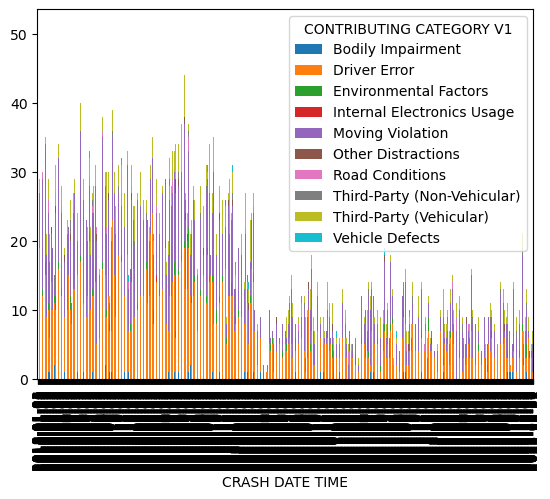

In [29]:
# create a pivot table to reshape the data for plotting
pivot_table = v1_cat_count.pivot(index='CRASH DATE TIME', columns='CONTRIBUTING CATEGORY V1', values='count').fillna(0)

# create a bar chart of the pivot table
pivot_table.plot(kind='bar', stacked=True)

# display the chart
plt.show()

In [30]:
#Group the values by year and count the number of instances of each value
v1_cat_yearcount = df.groupby([df['CRASH DATE TIME'].dt.year, 'CONTRIBUTING CATEGORY V1']).size().reset_index(name='count')

#Create pivot table of daily cause categories
yearly_cat_pivt = v1_cat_yearcount.pivot(index='CRASH DATE TIME', columns='CONTRIBUTING CATEGORY V1', values='count').fillna(0)
yearly_cat_pivt

CONTRIBUTING CATEGORY V1,Bodily Impairment,Driver Error,Environmental Factors,Internal Electronics Usage,Moving Violation,Other Distractions,Road Conditions,Third-Party (Non-Vehicular),Third-Party (Vehicular),Vehicle Defects
CRASH DATE TIME,,,,,,,,,,
2018,61.0,4487.0,211.0,5.0,3982.0,57.0,155.0,98.0,917.0,28.0
2019,69.0,4519.0,234.0,1.0,3594.0,62.0,131.0,87.0,1010.0,23.0
2020,37.0,1837.0,112.0,1.0,1389.0,22.0,55.0,49.0,525.0,16.0
2021,39.0,1548.0,101.0,3.0,1292.0,25.0,50.0,72.0,457.0,19.0
2022,44.0,1487.0,118.0,1.0,1245.0,24.0,48.0,97.0,396.0,15.0
2023,1.0,1.0,0.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0


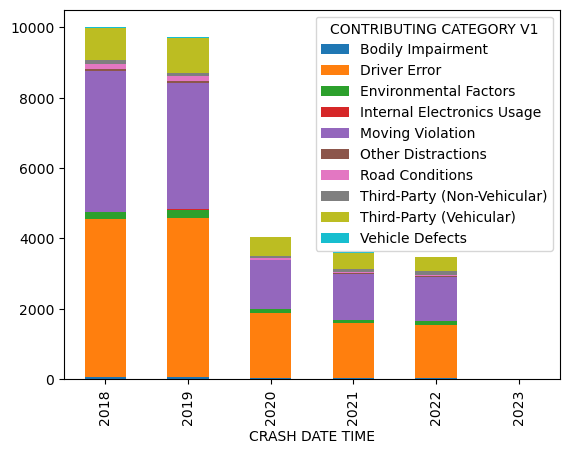

In [41]:
# create a bar chart of the pivot table
yearly_cat_pivt.plot(kind='bar', stacked=True)

# display the chart
plt.show();

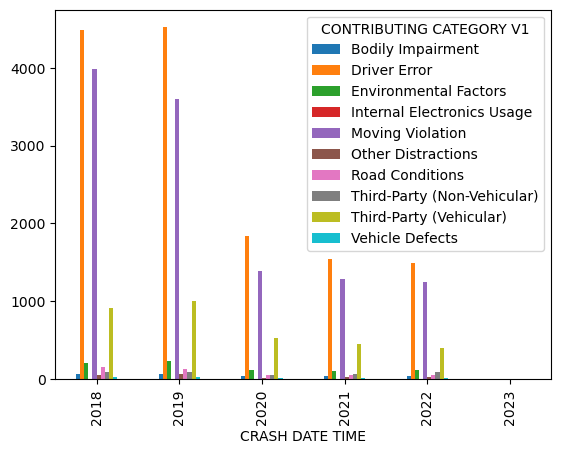

In [42]:
# create a bar chart of the pivot table
yearly_cat_pivt.plot(kind='bar')

# display the chart
plt.show();

### Vehicle Type

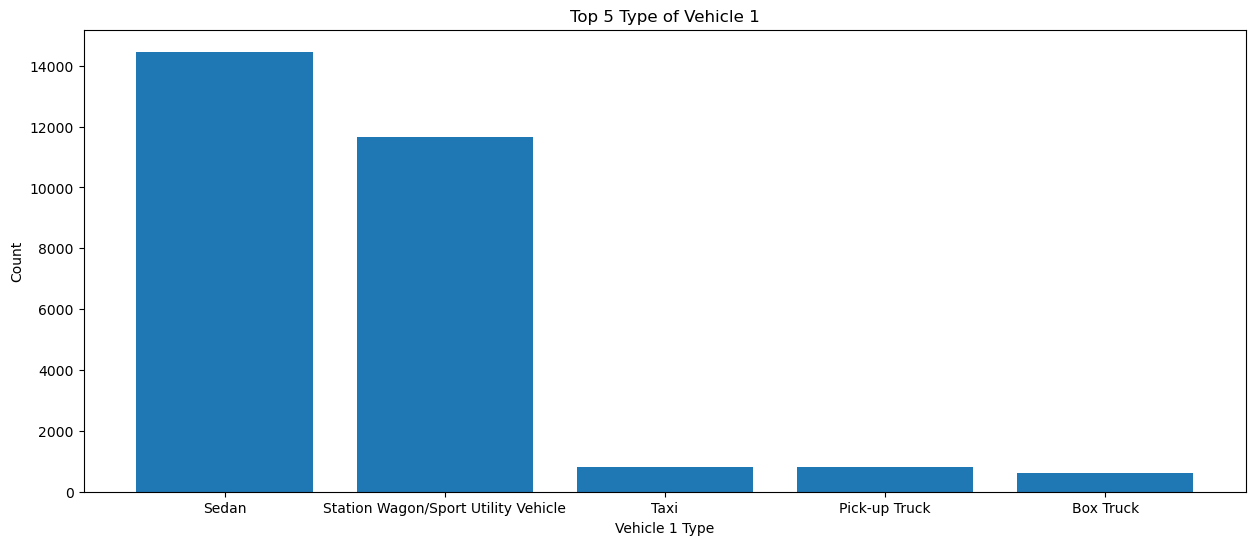

In [45]:
# Set up plots
fig, (ax) = plt.subplots(figsize=(15,6))

# Create variable for easier reuse
V1type_count = df['VEHICLE TYPE CODE 1'].value_counts()[:5]

# Plot bar chart 
ax.bar(V1type_count.index, V1type_count.values)

# Customize appearance
ax.set_xlabel('Vehicle 1 Type');
ax.set_ylabel('Count')
ax.set_title('Top 5 Type of Vehicle 1');

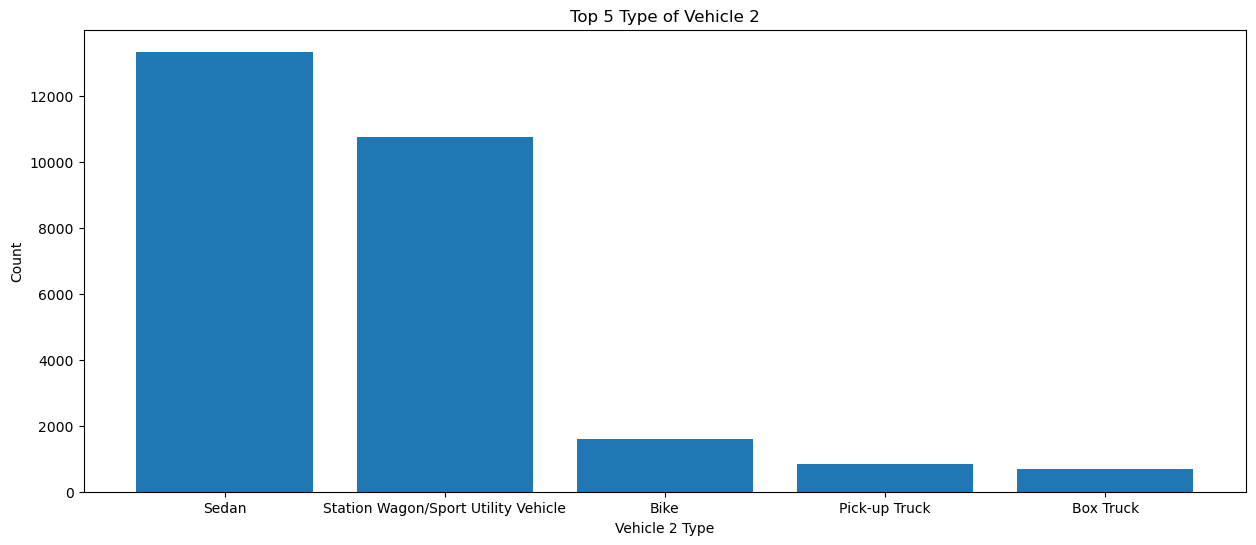

In [46]:
# Set up plots
fig, (ax) = plt.subplots(figsize=(15,6))

# Create variable for easier reuse
V1type_count = df['VEHICLE TYPE CODE 2'].value_counts()[:5]

# Plot bar chart 
ax.bar(V1type_count.index, V1type_count.values)

# Customize appearance
ax.set_xlabel('Vehicle 2 Type');
ax.set_ylabel('Count')
ax.set_title('Top 5 Type of Vehicle 2');

## Folium Maps